Loaded 18304 graphs
14643 train graphs, 3661 test graphs
Train loader: 458 batches, Test loader: 115 batches
Epoch 001 | Train Loss: 0.6289, Train Acc: 0.6704 | Test Loss: 0.6104, Test Acc: 0.6886
Epoch 002 | Train Loss: 0.5874, Train Acc: 0.6936 | Test Loss: 0.5881, Test Acc: 0.6818
Epoch 003 | Train Loss: 0.6019, Train Acc: 0.6921 | Test Loss: 0.5876, Test Acc: 0.6987
Epoch 004 | Train Loss: 0.5813, Train Acc: 0.7023 | Test Loss: 0.5790, Test Acc: 0.6853
Epoch 005 | Train Loss: 0.5978, Train Acc: 0.6982 | Test Loss: 0.5761, Test Acc: 0.6927
Epoch 006 | Train Loss: 0.5834, Train Acc: 0.7041 | Test Loss: 0.5921, Test Acc: 0.6859
Epoch 007 | Train Loss: 0.5714, Train Acc: 0.7037 | Test Loss: 0.5815, Test Acc: 0.7004
Epoch 008 | Train Loss: 0.5707, Train Acc: 0.7083 | Test Loss: 0.5891, Test Acc: 0.6957
Epoch 009 | Train Loss: 0.5703, Train Acc: 0.7098 | Test Loss: 0.5725, Test Acc: 0.7006
Epoch 010 | Train Loss: 0.5711, Train Acc: 0.7075 | Test Loss: 0.5797, Test Acc: 0.6965
Epoch 011 |

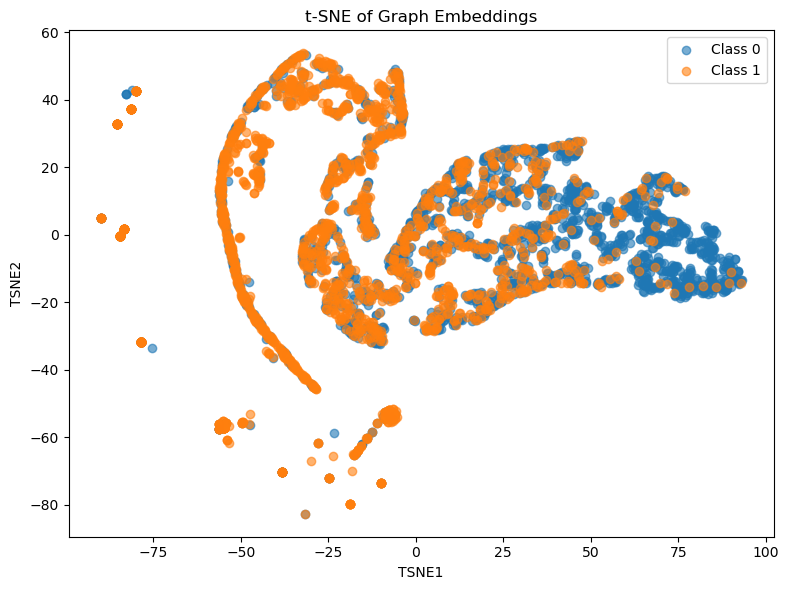

Saved tSNE plot to tsne_embeddings_test.png


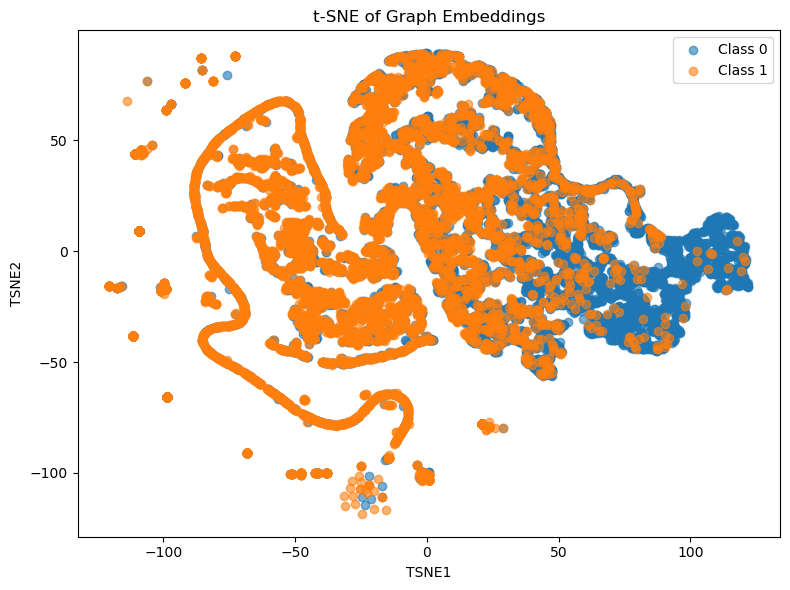

Saved tSNE plot to tsne_embeddings_train.png
Loaded 18304 graphs
14643 train graphs, 3661 test graphs


/DATA/hdhanu/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14643 samples in 0.001s...
[t-SNE] Computed neighbors for 14643 samples in 0.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14643
[t-SNE] Computed conditional probabilities for sample 2000 / 14643
[t-SNE] Computed conditional probabilities for sample 3000 / 14643
[t-SNE] Computed conditional probabilities for sample 4000 / 14643
[t-SNE] Computed conditional probabilities for sample 5000 / 14643
[t-SNE] Computed conditional probabilities for sample 6000 / 14643
[t-SNE] Computed conditional probabilities for sample 7000 / 14643
[t-SNE] Computed conditional probabilities for sample 8000 / 14643
[t-SNE] Computed conditional probabilities for sample 9000 / 14643
[t-SNE] Computed conditional probabilities for sample 10000 / 14643
[t-SNE] Computed conditional probabilities for sample 11000 / 14643
[t-SNE] Computed conditional probabilities for sample 12000 / 14643
[t-SNE] Computed conditional probabilities for sam

KeyboardInterrupt: 

In [2]:

# Train tsne plot
from sklearn.model_selection import train_test_split
import torch
from torch_geometric.loader import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from GNN_train import extract_embeddings

data_list = torch.load('/DATA/hdhanu/GNN/Manual_check/clean_scaled_processed_data.pt',weights_only=False)
print(f"Loaded {len(data_list)} graphs")

train_list, test_list = train_test_split(
    data_list, test_size=0.2, random_state=42, shuffle=True
)
print(f"{len(train_list)} train graphs, {len(test_list)} test graphs")

train_loader = DataLoader(train_list, batch_size=32, shuffle=True)

tsne = TSNE(n_components=2, random_state=42, n_iter=1000, verbose=1)

embeddings_train, labels_train = extract_embeddings(train_loader)
emb2d_train = tsne.fit_transform(embeddings_train)
plt.figure(figsize=(8,6))
for cls in np.unique(labels_train):
    idx = labels_train == cls
    plt.scatter(emb2d_train[idx,0], emb2d_train[idx,1], alpha=0.6, label=f"Class {cls}")
plt.legend()
plt.title("t-SNE of Graph Embeddings")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.tight_layout()
plt.savefig('tsne_embeddings_train.png')
plt.show()
print("Saved tSNE plot to tsne_embeddings_train.png")